In [ ]:
# Deep Learning
# Esse algoritmo tem função de classificar o valor número escrito a mão em uma imagem
# Os pixel da imagem são transformados em uma matriz, e cada um dos valores e analisado individualmente

In [1]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

Text(0.5, 1.0, '0')

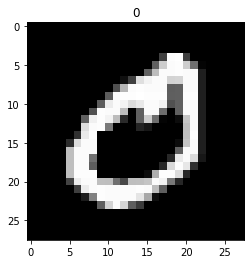

In [2]:
# Obtenção dos dados e divisão automática entre treinamento e teste
# Utilizando o banco de dados Mnist nativo da biblioteca Keras
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [3]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
# Transformando de Matriz para vetor
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [4]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [5]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [6]:
# Transformação para o formato dummy (temos 10 classes)
# Transformando uma classe que possui 10 valores diferentes, para um vetor de 10 posições com valores de 0 e 1
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [7]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [8]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [9]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4473 - accuracy: 0.8625 - val_loss: 0.1749 - val_accuracy: 0.9451
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2325 - accuracy: 0.9340 - val_loss: 0.1334 - val_accuracy: 0.9593
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1945 - accuracy: 0.9438 - val_loss: 0.1158 - val_accuracy: 0.9643
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1722 - accuracy: 0.9494 - val_loss: 0.1138 - val_accuracy: 0.9645
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1540 - accuracy: 0.9552 - val_loss: 0.1061 - val_accuracy: 0.9670
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1435 - accuracy: 0.9579 - val_loss: 0.1024 - val_accuracy: 0.9697
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1332 - accuracy: 0.9609 - val_loss: 0.0932 - val_accuracy:

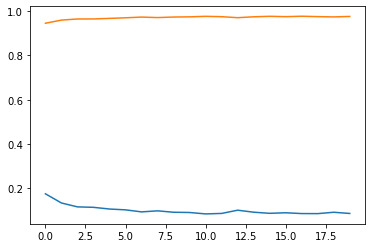

In [10]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [11]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

array([[2.93980451e-10, 4.52866743e-07, 3.22005872e-05, ...,
        9.99704421e-01, 7.49203899e-09, 2.20607704e-04],
       [7.44174455e-09, 3.48962260e-07, 9.99991655e-01, ...,
        5.04582340e-06, 2.90767872e-08, 1.75672792e-11],
       [2.88014885e-14, 9.99999285e-01, 1.06322515e-08, ...,
        8.31860874e-08, 4.46689313e-07, 4.22325412e-12],
       ...,
       [3.51648588e-13, 1.33477451e-08, 7.97877959e-08, ...,
        1.75246228e-07, 1.13919661e-07, 3.68091378e-06],
       [1.95104587e-14, 6.32732685e-17, 5.25294894e-16, ...,
        1.22254997e-15, 2.91697287e-12, 1.01495068e-09],
       [1.22420601e-13, 3.47982969e-21, 1.34795314e-16, ...,
        1.82251280e-22, 2.82513207e-15, 9.07576898e-23]], dtype=float32)

In [12]:
# Valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 968,    0,    1,    2,    0,    2,    4,    1,    2,    0],
       [   0, 1127,    2,    0,    0,    1,    2,    0,    3,    0],
       [   1,    1, 1012,    4,    5,    0,    1,    3,    5,    0],
       [   0,    0,    4,  983,    1,   11,    0,    2,    5,    4],
       [   2,    0,    1,    0,  957,    0,   10,    3,    1,    8],
       [   2,    0,    0,    8,    1,  869,    5,    1,    5,    1],
       [   4,    3,    0,    0,    6,    7,  937,    0,    1,    0],
       [   2,    4,   15,    3,    1,    0,    0,  995,    1,    7],
       [   5,    3,    6,    4,    4,    7,    5,    2,  932,    6],
       [   4,    4,    0,    4,   13,    1,    0,    2,    3,  978]],
      dtype=int64)

In [13]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred